In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)



> **Pre Processing data**



In [ ]:
# mengatasi mising value
data.dropna(inplace=True)


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

data['NObeyesdad'] = data['NObeyesdad'].astype('category')

In [ ]:
# Normalisasi fitur numerik
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(data[numeric_cols])
data[numeric_cols] = scaled_data

In [ ]:
# Pisahkan fitur dan target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




> **Exploratory Data Analysis (EDA)**



In [ ]:
# Statistik deskriptif
print("Statistik deskriptif data:")
print(data.describe())

Statistik deskriptif data:
               Age        Gender        Height        Weight          CALC  \
count  2111.000000  2.111000e+03  2.111000e+03  2.111000e+03  2.111000e+03   
mean      0.000000 -5.385449e-17 -5.385449e-16 -5.385449e-16 -5.048859e-17   
std       1.000237  1.000237e+00  1.000237e+00  1.000237e+00  1.000237e+00   
min      -1.625448 -1.011914e+00 -2.698006e+00 -1.817304e+00 -4.401822e+00   
25%      -0.688066 -1.011914e+00 -7.683883e-01 -8.062914e-01 -5.211595e-01   
50%      -0.241897  9.882266e-01 -1.263207e-02 -1.369510e-01 -5.211595e-01   
75%       0.265964  9.882266e-01  7.159595e-01  7.960531e-01  1.419172e+00   
max       5.782584  9.882266e-01  2.983646e+00  3.300136e+00  1.419172e+00   

               FAVC          FCVC           NCP           SCC         SMOKE  \
count  2.111000e+03  2.111000e+03  2.111000e+03  2.111000e+03  2.111000e+03   
mean   1.346362e-16 -1.346362e-17  4.964711e-16 -6.731812e-17 -2.019544e-17   
std    1.000237e+00  1.000237e+00

In [ ]:
# Summaries
print("\nInformasi dataset:")
print(data.info())
print("\nJumlah nilai unik per kolom:")
print(data.nunique())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2111 non-null   float64 
 1   Gender                          2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   CALC                            2111 non-null   float64 
 5   FAVC                            2111 non-null   float64 
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   SCC                             2111 non-null   float64 
 9   SMOKE                           2111 non-null   float64 
 10  CH2O                            2111 non-null   float64 
 11  family_history_with_overweight  2111 non-null   float64 
 12  

In [ ]:
# Distribusi target
target_counts = data['NObeyesdad'].value_counts()
print("\nDistribusi kelas target:")
print(target_counts)


Distribusi kelas target:
NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64


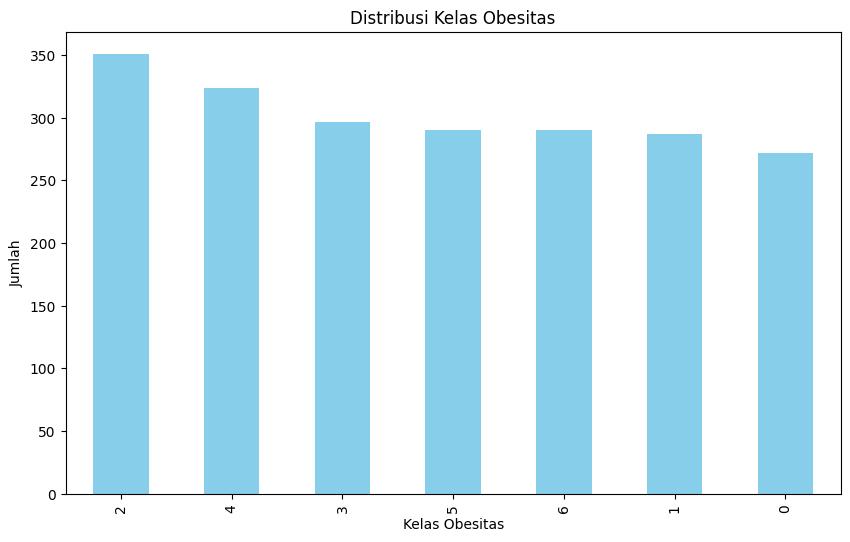

In [ ]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kelas Obesitas')
plt.xlabel('Kelas Obesitas')
plt.ylabel('Jumlah')
plt.show()

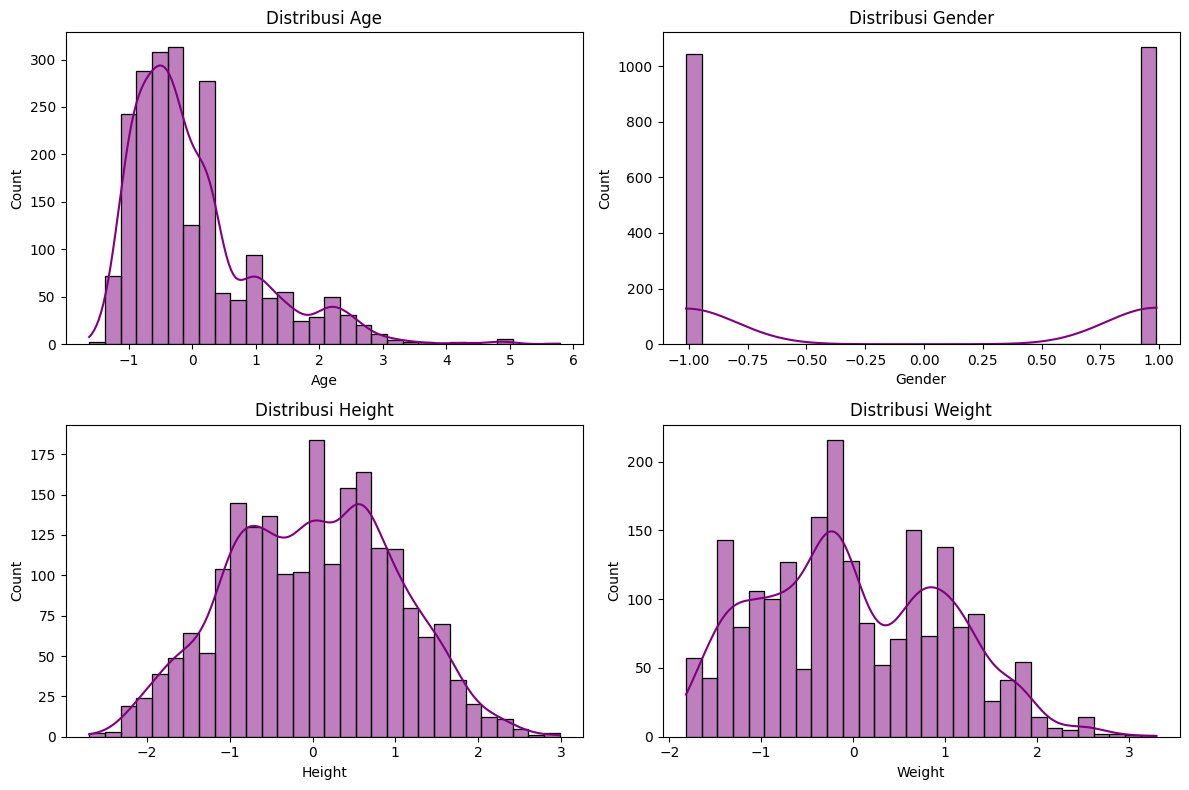

In [ ]:
# Melihat distribusi beberapa fitur numerik
numeric_sample_cols = numeric_cols[:4]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_sample_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

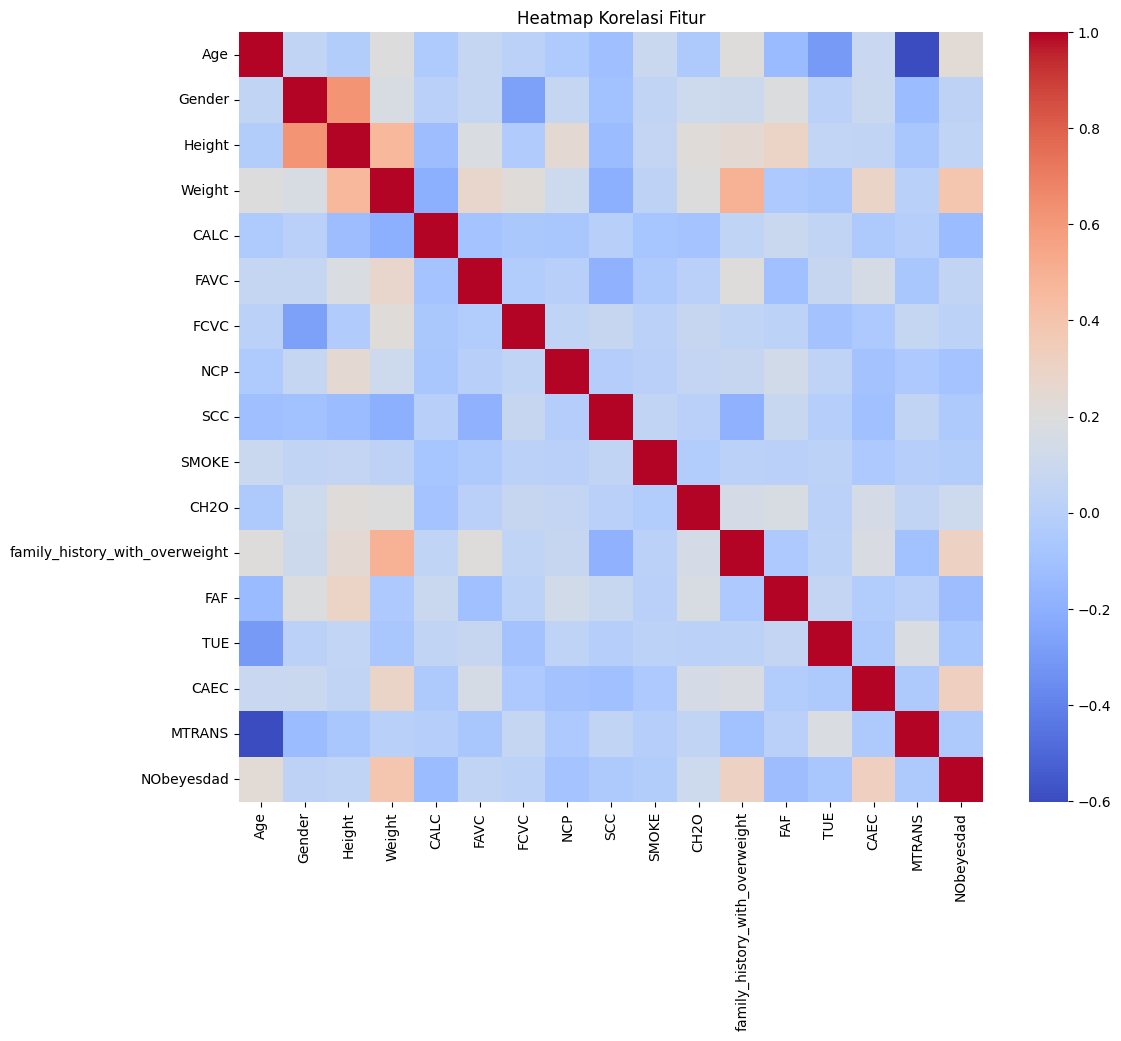

In [ ]:
# Korelasi antar fitur
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Fitur')
plt.show()



> **Seleksi Fitur**



In [ ]:
# Menggunakan SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih berdasarkan SelectKBest:")
print(selected_features)

X = X[selected_features]

Fitur yang dipilih berdasarkan SelectKBest:
Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],
      dtype='object')




> **Modeling**



In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Training model
rf_model.fit(X_train[selected_features], y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test[selected_features])

print("model siap digunakan")

model siap digunakan
